<a href="https://colab.research.google.com/github/samiha-mahin/A-Machine-Learning-Models-Repo/blob/main/GradientBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### 🌟 What is Gradient Boosting?

**Gradient Boosting** is also an **ensemble method** like AdaBoost — it combines many weak models (usually small decision trees) to create a **strong prediction model**.

But instead of focusing on *which samples were wrong* like AdaBoost, Gradient Boosting tries to **reduce the errors step-by-step by learning the “gradient” (direction) of mistakes** — basically, it tries to fix the biggest errors gradually.

---

### 🔄 How Gradient Boosting Works (step-by-step, simply):

---

### 🎯 Real-Life Example: Predicting House Prices

Imagine you want to predict house prices based on some features.

---

#### Step 1: Start with a simple model

* First, build a very simple model — like predicting the **average price** for all houses.
* It’s a weak prediction because it ignores differences between houses.

---

#### Step 2: Calculate errors (residuals)

* Check how far off each prediction is from the actual price.
* These differences are called **residuals** (actual - predicted).

---

#### Step 3: Build a new model to predict the errors

* Next, build a new weak model that tries to predict those residuals.
* This model’s job is to correct the mistakes of the first model.

---

#### Step 4: Update the prediction

* Add the predictions from the new model to the old predictions.
* The overall prediction improves a bit.

---

#### Step 5: Repeat many times

* Keep repeating Steps 2–4:

  * Calculate new residuals (errors) from the updated predictions.
  * Build another model to predict these new residuals.
  * Add the new model’s predictions to the total prediction.

---

### 📦 Final result:

After many rounds, all these small corrections add up to a **strong model** that accurately predicts house prices.

---

### 💡 Key Concepts:

| Concept            | Explanation                                                                           |
| ------------------ | ------------------------------------------------------------------------------------- |
| **Weak learner**   | Usually small decision trees (simple models)                                          |
| **Residuals**      | Errors of previous model’s prediction                                                 |
| **Additive model** | Each new model fixes errors of previous models                                        |
| **Gradient**       | Direction of steepest error reduction (like slope)                                    |
| **Learning rate**  | How much of the new model’s prediction is added each time (helps control overfitting) |

---

### 🔥 Why Gradient Boosting is Powerful:

* It **optimizes errors step-by-step** in the direction that reduces error fastest (using gradient descent ideas).
* Flexible and works well on many problems (classification, regression).
* Can handle different loss functions (e.g., squared error, absolute error).
* Usually more accurate than AdaBoost, but more complex.

---

### 🚫 Limitations:

* Can be **slow to train** because it builds models sequentially.
* Can **overfit** if too many iterations or too complex trees are used.
* Needs careful tuning of parameters (like learning rate, number of trees).

---

### ✅ Summary (simple checklist):

* \[✓] Builds model step-by-step to fix errors (residuals)
* \[✓] Uses gradient (error direction) to improve predictions
* \[✓] Combines many weak learners additively
* \[✓] Controls overfitting with learning rate and tree size




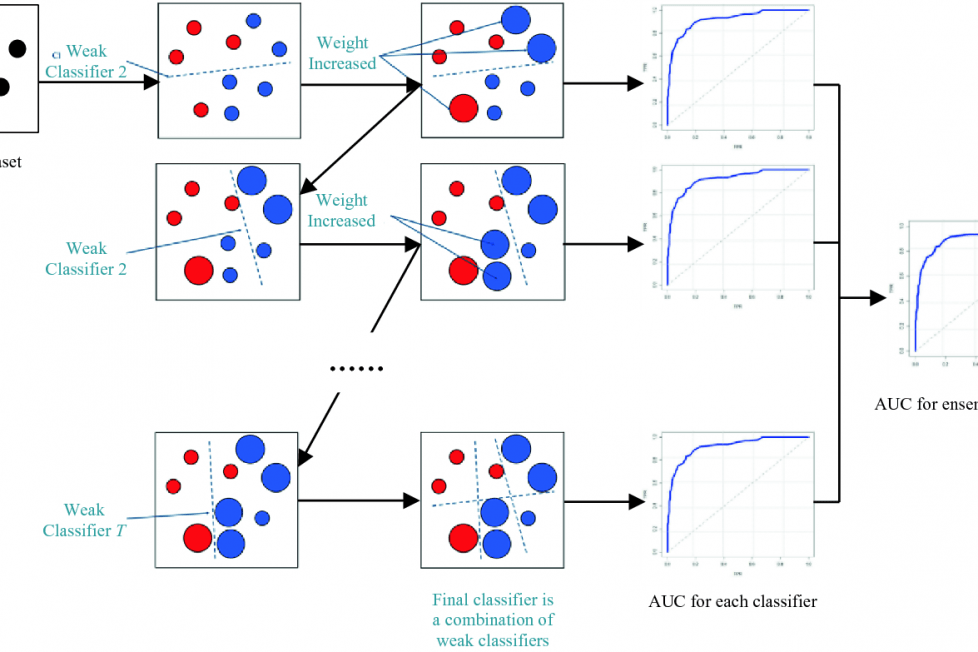

# **1. Titanic – Gradient Boosting Classifier**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [12]:
data = pd.read_csv('/content/titanic.csv')

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Column types
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Pclass', 'Sex', 'Embarked']

In [15]:
# Preprocessing
num_transformer = SimpleImputer(strategy='mean')
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

In [16]:
clf = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])

In [17]:
# Train and evaluate
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy on Titanic: {accuracy:.2f}")


Gradient Boosting Accuracy on Titanic: 0.82


# **2. California Housing – Gradient Boosting Regressor**

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [24]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [27]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting MSE on California Housing: {mse:.3f}")
print(f"Gradient Boosting R2 Score: {r2:.2f}")

Gradient Boosting MSE on California Housing: 0.294
Gradient Boosting R2 Score: 0.78
